In [1]:
%reset -f

import numpy as np
import scipy.io as sp
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.layers import Dense, Input, Lambda, Dot, LSTM
from tensorflow.keras.layers.experimental import preprocessing

dt = 0.01
min_t = 0
max_t = 2

t = np.arange(min_t, max_t, dt)
lt = t.shape[0]

data = sp.loadmat('BW_data.mat')
f = data['force']
y = data['y1']

f = f[0:150,:]
y = y[0:150,:]

f.shape, y.shape

((150, 200), (150, 200))

In [2]:
X_data = f
y_data = y[..., np.newaxis]

X_data.shape, y_data.shape

((150, 200), (150, 200, 1))

In [3]:
from sklearn.preprocessing import MinMaxScaler

X_data_flatten = np.reshape(X_data, [X_data.shape[0]*X_data.shape[1], 1])
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_X.fit(X_data_flatten)
X_data_flatten_map = scaler_X.transform(X_data_flatten)
X_data_map = np.reshape(X_data_flatten_map, [X_data.shape[0], X_data.shape[1], 1])

y_data_flatten = np.reshape(y_data, [y_data.shape[0]*y_data.shape[1], y_data.shape[2]])
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_y.fit(y_data_flatten)
y_data_flatten_map = scaler_y.transform(y_data_flatten)
y_data_map = np.reshape(y_data_flatten_map, [y_data.shape[0], y_data.shape[1], y_data.shape[2]])

X_data_map.shape, y_data_map.shape

((150, 200, 1), (150, 200, 1))

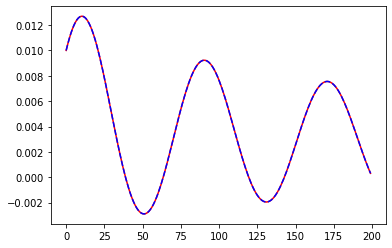

In [4]:
plt.plot(y_data[0,:,:], 'r')
plt.plot( scaler_y.inverse_transform(y_data_map[0,:,:]), 'b--')

In [5]:
X_data_new = X_data_map
y_data_new = y_data_map

In [6]:
train_indices = 150

X_train = X_data_new[0:train_indices]
y_train = y_data_new[0:train_indices]

X_train.shape, y_train.shape

((150, 200, 1), (150, 200, 1))

In [7]:
data_dim = X_train.shape[2]  # number of input features
timesteps = X_train.shape[1]
num_classes = y_train.shape[2]  # number of output features
batch_size = 10

data_dim, timesteps, num_classes

(1, 200, 1)

In [8]:
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import SimpleRNN

adam = Adam(learning_rate=0.001, decay=0.0001)
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, stateful=False, input_shape=(None, data_dim)))
model.add(Dense(num_classes))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 50)          2600      
                                                                 
 dense (Dense)               (None, None, 1)           51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mean_squared_error', optimizer=adam)

In [10]:
for i in range(0, 50):
    model.fit(X_train, y_train, epochs=1)
    model.fit(X_train, y_train, epochs=19, verbose = 0)

5/5 [==============================] - 1s 135ms/step - loss: 0.0016


In [15]:
model.save_weights('./model/RNN_wts')

(150, 200) (150, 200, 1)
0
(10000, 200) (10000, 200)


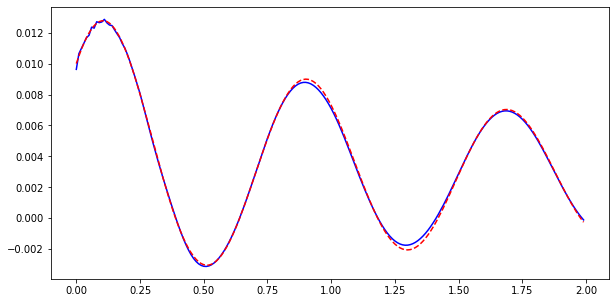

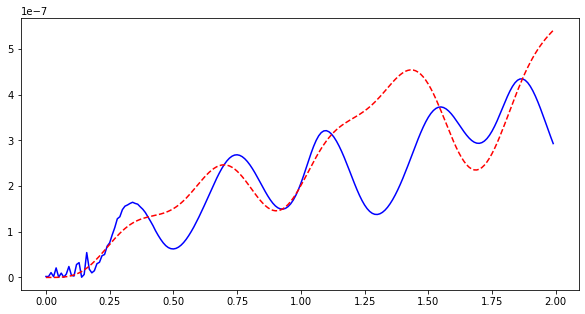

1
(10000, 200) (10000, 200)


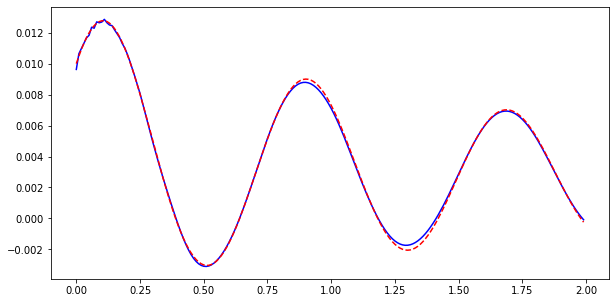

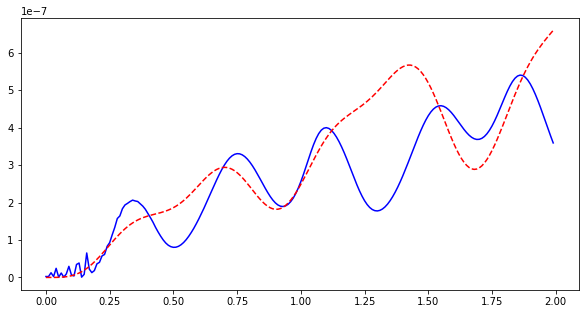

2
(10000, 200) (10000, 200)


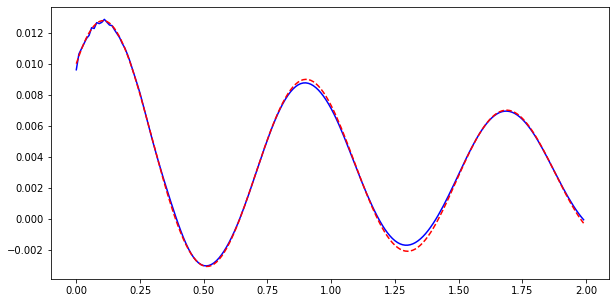

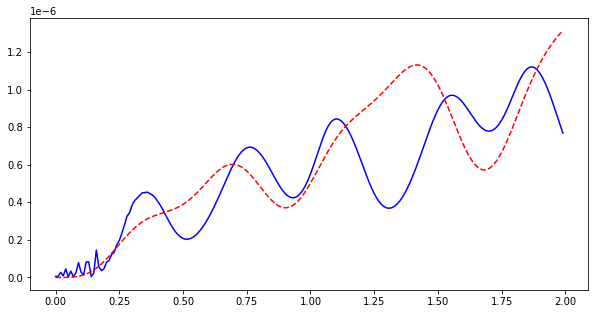

3
(10000, 200) (10000, 200)


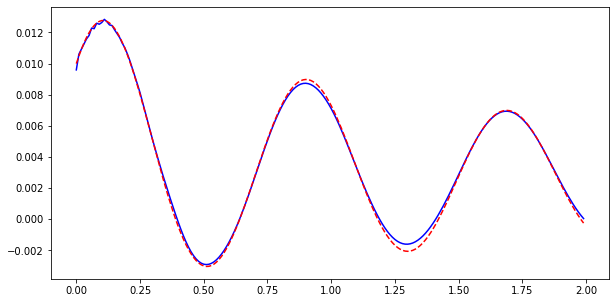

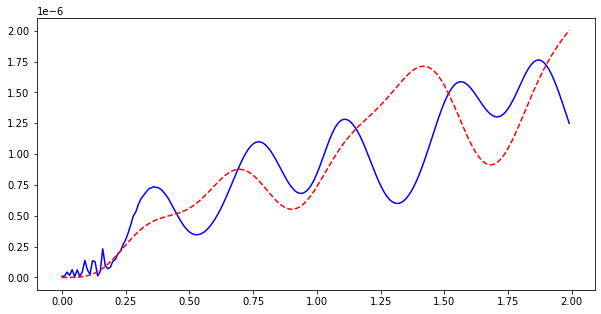

4
(10000, 200) (10000, 200)


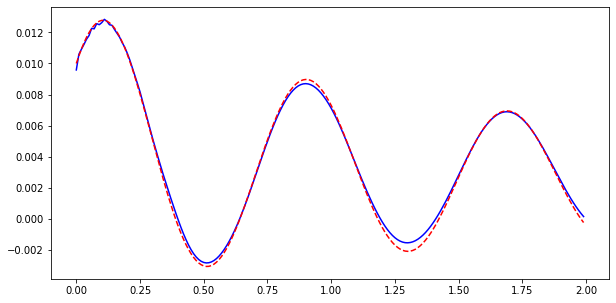

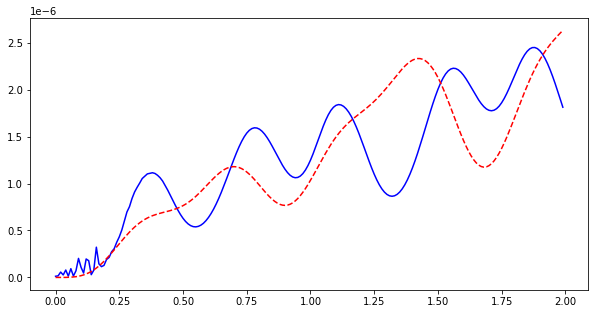

In [20]:
%reset -f

import time
import numpy as np
import scipy.io as spi
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.layers import Dense, Input, Lambda, Dot, LSTM
from tensorflow.keras.layers.experimental import preprocessing

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import SimpleRNN

dt = 0.01
min_t = 0
max_t = 2

t = np.arange(min_t, max_t, dt)
lt = t.shape[0]

samples = 10000

data = spi.loadmat('BW_data.mat')
f_traintoscale = data['force'][0:150,:]
y_traintoscale = data['y1'][0:150,:]

y_traintoscale = y_traintoscale[..., np.newaxis]
    
print(f_traintoscale.shape, y_traintoscale.shape)

X_data = f_traintoscale
y_data = y_traintoscale

from sklearn.preprocessing import MinMaxScaler

X_data_flatten = np.reshape(X_data, [X_data.shape[0]*X_data.shape[1], 1])
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_X.fit(X_data_flatten)

y_data_flatten = np.reshape(y_data, [y_data.shape[0]*y_data.shape[1], y_data.shape[2]])
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_y.fit(y_data_flatten)

adam = Adam(learning_rate=0.001, decay=0.0001)
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, stateful=False, input_shape=(None, 1)))
model.add(Dense(1))
# model.summary()

model.compile(loss='mean_squared_error', optimizer=adam)   

string = './model/RNN_wts'
model.load_weights(string)

ft = [20, 25, 50, 75, 100]
for ftnum in range(0,5):
    print(ftnum)
    string = 'BW_SDOF_testing_data_FT_'+str(ft[ftnum])+'.mat'
    test_data = spi.loadmat(string)
    
    f = test_data['force'].T
    y = test_data['y1'].T
    
    print(f.shape, y.shape)

    with tf.device('/device:cpu:0'):
        X_data = f
        X_data_flatten = np.reshape(X_data, [X_data.shape[0]*X_data.shape[1], 1])
        X_data_flatten_map = scaler_X.transform(X_data_flatten)
        X_data_map = np.reshape(X_data_flatten_map, [X_data.shape[0], X_data.shape[1], 1])

        X_data_new = X_data_map

        test_indices = 10000
        X_test = X_data_new[0:test_indices]
        predictions = model.predict(X_test)

        pred_disp = np.zeros([y.shape[0], y.shape[1], 1])
        for i in range(0,10000):
            pred_disp[i,:,:] = scaler_y.inverse_transform(predictions[i,:,:])

        plt.figure(figsize=[10,5])
        plt.plot(t,np.mean(pred_disp, axis = 0), 'b')
        plt.plot(t,np.mean(y, axis = 0), 'r--')
        plt.show()

        plt.figure(figsize=[10,5])
        plt.plot(t,np.var(pred_disp, axis = 0), 'b')
        plt.plot(t,np.var(y, axis = 0), 'r--')
        plt.show()

        string = 'RNN3L_SDOF_BW_training_samples_'+str(150)+'_FT_'+str(ft[ftnum])+'.mat' 
        spi.savemat(string,{'actual_y': y, 'predicted_y': np.squeeze(pred_disp), 'model_num': 150, 'fourier_terms': ft[ftnum]})
